In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df=pd.read_csv(r"D:\project\2 new projects\archive (6)\heart_cleveland_upload.csv")


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [5]:
df.nunique(axis=0)

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

returns the number of unique values for each variable.

In [6]:
df.shape

(297, 14)

here 297 no of rows and 14 columns

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

There are 13 attributes

age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg ecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
condition: 0 = no disease, 1 = disease

In [8]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

there is no null values 

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


as we can see min max values counts for all attributes also we can analyse the mean, std counts for the same

In [10]:
df['sex'].value_counts()

1    201
0     96
Name: sex, dtype: int64

201 males and 96 females

# Exploratory Data analysis

Let us look at the people’s age who are suffering from the disease or not.
Here, target = 1 implies that the person is suffering from heart disease and target = 0 implies the person is not suffering.

We see that most people who are suffering are of the age of 58, followed by 57.
Majorly, people belonging to the age group 50+ are suffering from the disease.

Text(0.5, 1.0, 'distribution of age vs sex')

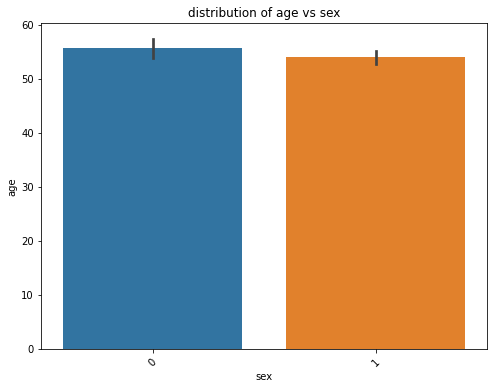

In [11]:
plt.figure(figsize = (8, 6))
ax = sns.barplot(x='sex', y='age', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('distribution of age vs sex')

<AxesSubplot:title={'center':'heatmap'}>

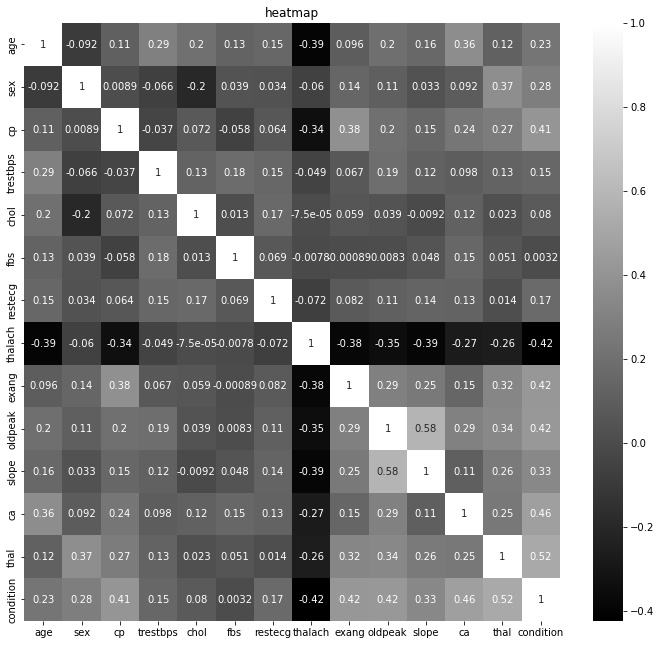

In [55]:
corr=df.corr()
plt.figure(figsize=(12,11))
plt.title("heatmap")
sns.heatmap(corr, cmap='gist_gray', annot=True)

In [13]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df[['condition']]

Text(26.426458333333343, 0.5, 'ST depression')

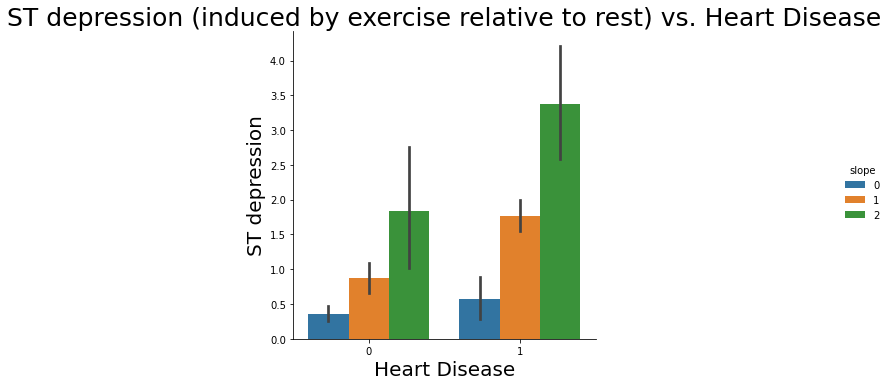

In [44]:
sns.catplot(x="condition", y="oldpeak", hue="slope", kind="bar", data=df);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

ST segment depression occurs because when the ventricle is at rest and therefore repolarized. If the trace in the ST segment is abnormally low below the baseline, this can lead to this Heart Disease. This is supports the plot above because low ST Depression yields people at greater risk for heart disease. While a high ST depression is considered normal & healthy. The “slope” hue, refers to the peak exercise ST segment, with values: 0: upsloping , 1: flat , 2: downsloping). Both positive & negative heart disease patients exhibit equal distributions of the 3 slope categories.

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

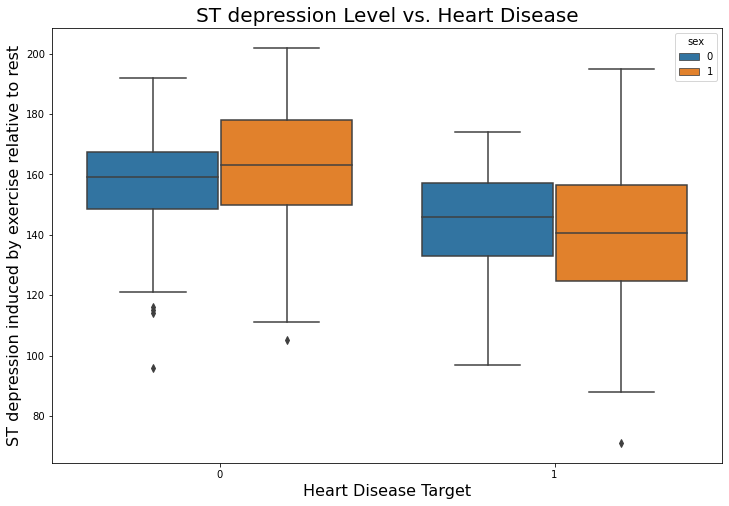

In [47]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'condition', y= 'thalach',hue="sex", data=df )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

Positive patients exhibit a heightened median for ST depression level, while negative patients have lower levels. In addition, we don’t see many differences between male & female target outcomes, expect for the fact that males have slightly larger ranges of ST Depressio

In [48]:
# Filtering data by positive & negative Heart Disease patient

In [52]:
# Filtering data by POSITIVE Heart Disease patient


pos_data = df[df['condition']==1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0
mean,56.759124,0.817518,2.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,0.824818,1.145985,1.372263,1.0
std,7.899670,0.387658,0.828201,18.896730,49.679937,0.354387,0.976924,22.710673,0.500215,1.305006,0.567474,1.018506,0.882904,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,53.000000,1.000000,3.000000,120.000000,218.000000,0.000000,0.000000,125.000000,0.000000,0.600000,0.000000,0.000000,0.000000,1.0
50%,58.000000,1.000000,3.000000,130.000000,253.000000,0.000000,2.000000,142.000000,1.000000,1.400000,1.000000,1.000000,2.000000,1.0
75%,62.000000,1.000000,3.000000,145.000000,284.000000,0.000000,2.000000,157.000000,1.000000,2.500000,1.000000,2.000000,2.000000,1.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.0


In [53]:
# Filtering data by NEGATIVE Heart Disease patient

pos_data = df[df['condition']==0]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,160.000000,160.000000,160.000000,160.00000,160.00000,160.000000,160.00000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.0
mean,52.643750,0.556250,1.793750,129.17500,243.49375,0.143750,0.84375,158.581250,0.143750,0.59875,0.412500,0.275000,0.375000,0.0
std,9.551151,0.498386,0.925508,16.37399,53.75755,0.351938,0.98764,19.043304,0.351938,0.78716,0.597558,0.633945,0.758599,0.0
min,29.000000,0.000000,0.000000,94.00000,126.00000,0.000000,0.00000,96.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
25%,44.750000,0.000000,1.000000,120.00000,208.75000,0.000000,0.00000,149.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
50%,52.000000,1.000000,2.000000,130.00000,235.50000,0.000000,0.00000,161.000000,0.000000,0.20000,0.000000,0.000000,0.000000,0.0
75%,59.000000,1.000000,2.000000,140.00000,268.25000,0.000000,2.00000,172.000000,0.000000,1.10000,1.000000,0.000000,0.000000,0.0
max,76.000000,1.000000,3.000000,180.00000,564.00000,1.000000,2.00000,202.000000,1.000000,4.20000,2.000000,3.000000,2.000000,0.0


From comparing positive and negative patients we can see there positive patients experience heightened maximum heart rate achieved (thalach) average

In [ ]:
# standardization of data
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
# fiting suing scaler.fit
scaler_fit=scaler.fit(X)

In [17]:
# generate the standardize value of x and y
X=scaler_fit.transform(X)

In [18]:
# split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train.shape

(207, 13)

In [20]:
X_test.shape

(90, 13)

In [21]:
y_train.shape

(207, 1)

In [22]:
y_test.shape

(90, 1)

# model building

# SVM (Support vector machine) classifier

In [23]:
from sklearn.svm import SVC

In [24]:
# if the data is not linerarly seperable, the SVM use a kernal function to map the data into a higher-dimentional
#space where the classes are seperable. some common kernal function include linear, polynomiall and radial basis function.
model=SVC(kernel = 'linear', C = 1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [25]:
svm_pred=model.predict(X_test)

In [26]:
print(svm_pred)

[1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0
 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0]


In [27]:
# model accuracy for X_test  
accuracy = model.score(X_test, y_test)
print(accuracy*100,'%')

81.11111111111111 %


In [28]:
cm=confusion_matrix(y_test,svm_pred)
print(cm)
print()
print("clssification report\n")
print( classification_report(y_test,svm_pred))

[[37 11]
 [ 6 36]]

clssification report

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        48
           1       0.77      0.86      0.81        42

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90



# naive bays classifier

In [29]:
# training naive bayes classifier

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)


In [32]:
accuracy=gnb.score(X_test, y_test)
print(accuracy*100,'%')
print()
print(classification_report(y_test,gnb_predictions))
cm=confusion_matrix(y_test,gnb_predictions)
print("confusion_matrix for testing set\n\n",cm)


80.0 %

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        48
           1       0.76      0.83      0.80        42

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90

confusion_matrix for testing set

 [[37 11]
 [ 7 35]]


# logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [35]:
predictions = logmodel.predict(X_test)


In [36]:
accuracy=logmodel.score(X_test,y_test)
print(accuracy*100,"%")

78.88888888888889 %


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

print("confusion_matix\n\n",confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.82      0.77      0.80        48
           1       0.76      0.81      0.78        42

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90

confusion_matix

 [[37 11]
 [ 8 34]]


# decision Tree classifier

In [38]:
# training the Decision tree classification model on the training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
#predicting the test set result
y_pred=classifier.predict(X_test)

In [40]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [56]:
# making the confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
acc=accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print()
print(acc*100,"%")

[[37 11]
 [11 31]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        48
           1       0.74      0.74      0.74        42

    accuracy                           0.76        90
   macro avg       0.75      0.75      0.75        90
weighted avg       0.76      0.76      0.76        90


75.55555555555556 %
